# Iris flower prediciton using Machine Learning


AUthor :  LAGRE GABBA BERTRAND

## 1. Data reading

In [1]:
# we import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
import xgboost as xgb
import joblib,pickle 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.dtypes.to_list()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O')]

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Data Visualization

In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

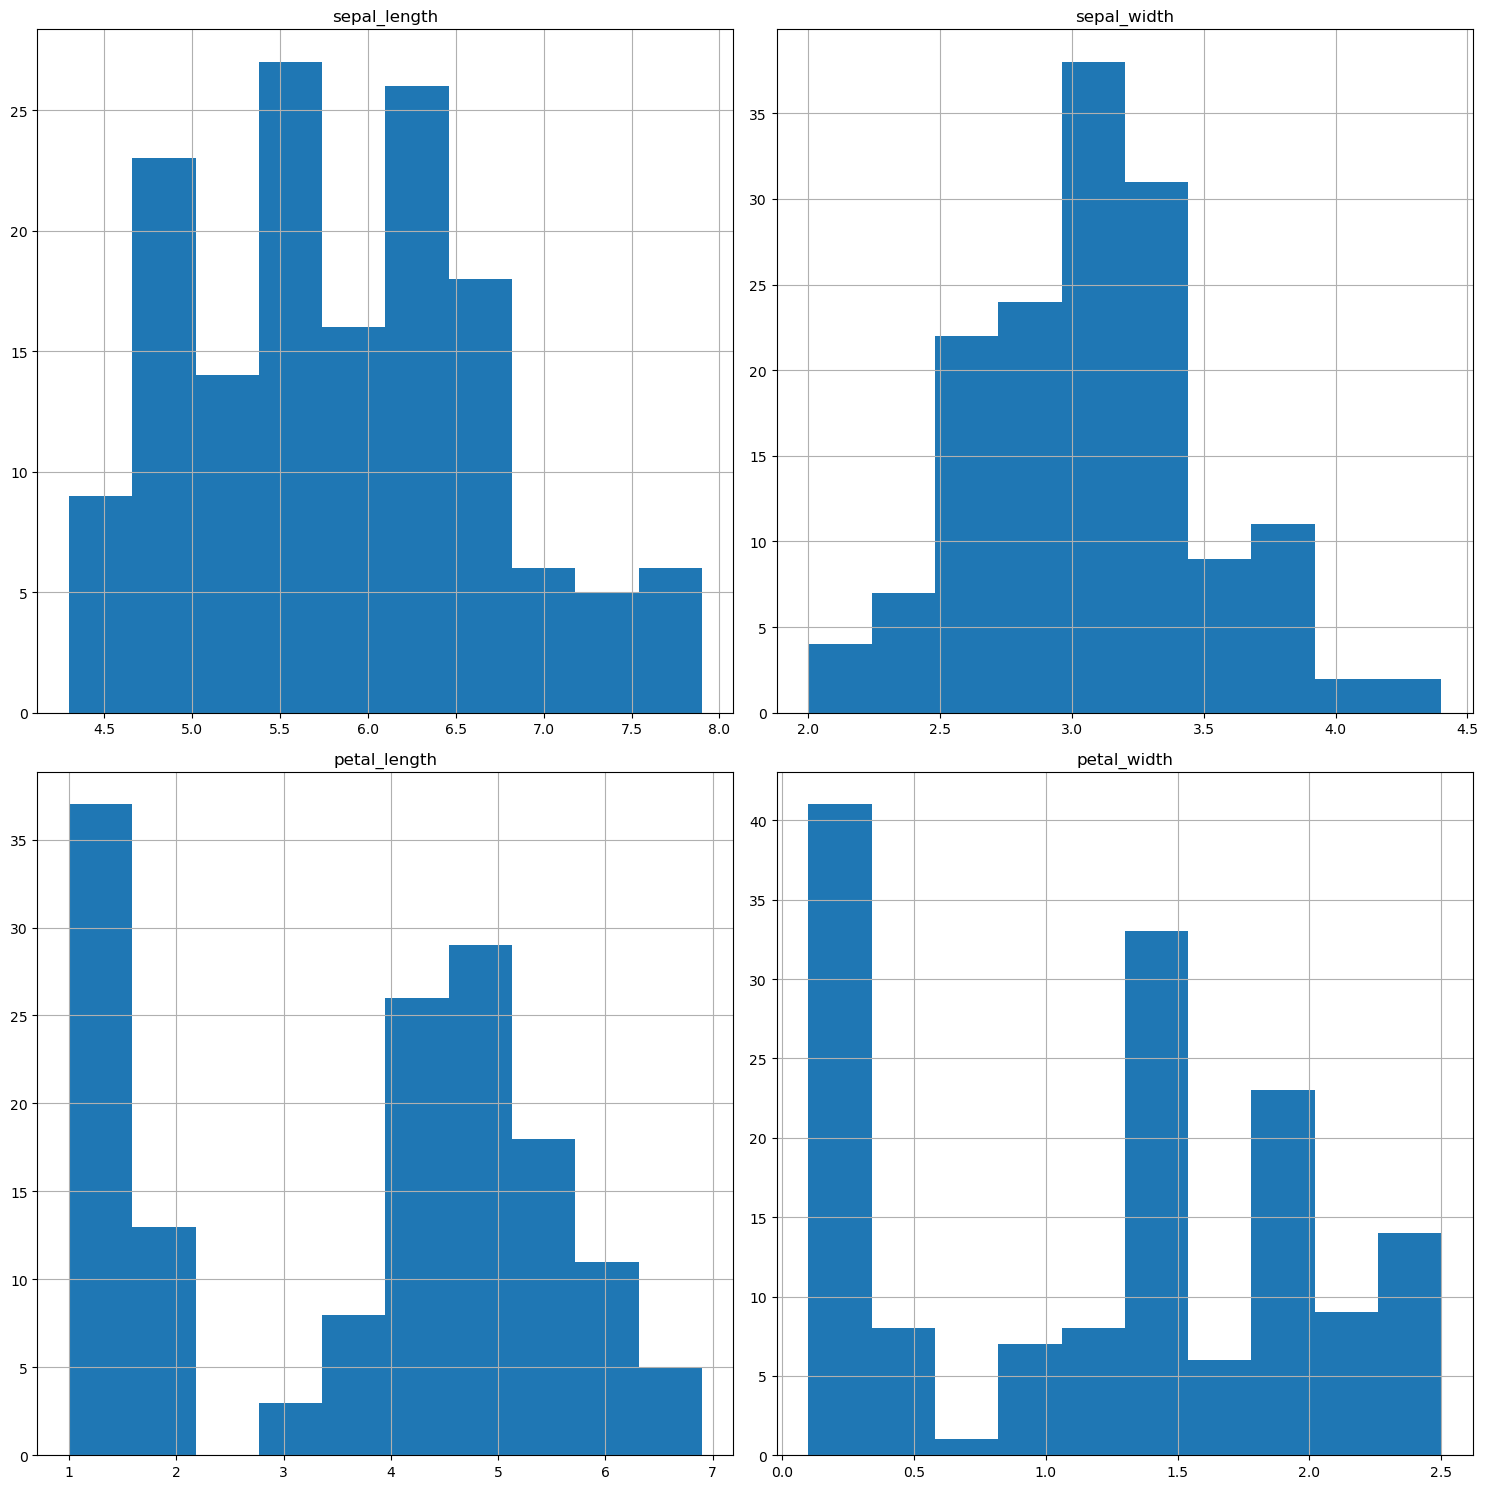

In [6]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [7]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
columns = df.columns.tolist()
len(columns)

5

In [9]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

,sepal_length,sepal_width,petal_length,petal_width
skewness,0.314911,0.334053,-0.274464,-0.104997
kurtosis,-0.552064,0.290781,-1.401921,-1.339754


there are outlier that we want to remove.

In [10]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [11]:
pd.DataFrame(data=[df[columns[0:30]].skew(),df[columns[0:30]].kurtosis()],index=['skewness','kurtosis'])

,sepal_length,sepal_width,petal_length,petal_width,species
skewness,0.314911,0.334053,-0.274464,-0.104997,0.000000
kurtosis,-0.552064,0.290781,-1.401921,-1.339754,-1.510135


<Axes: >

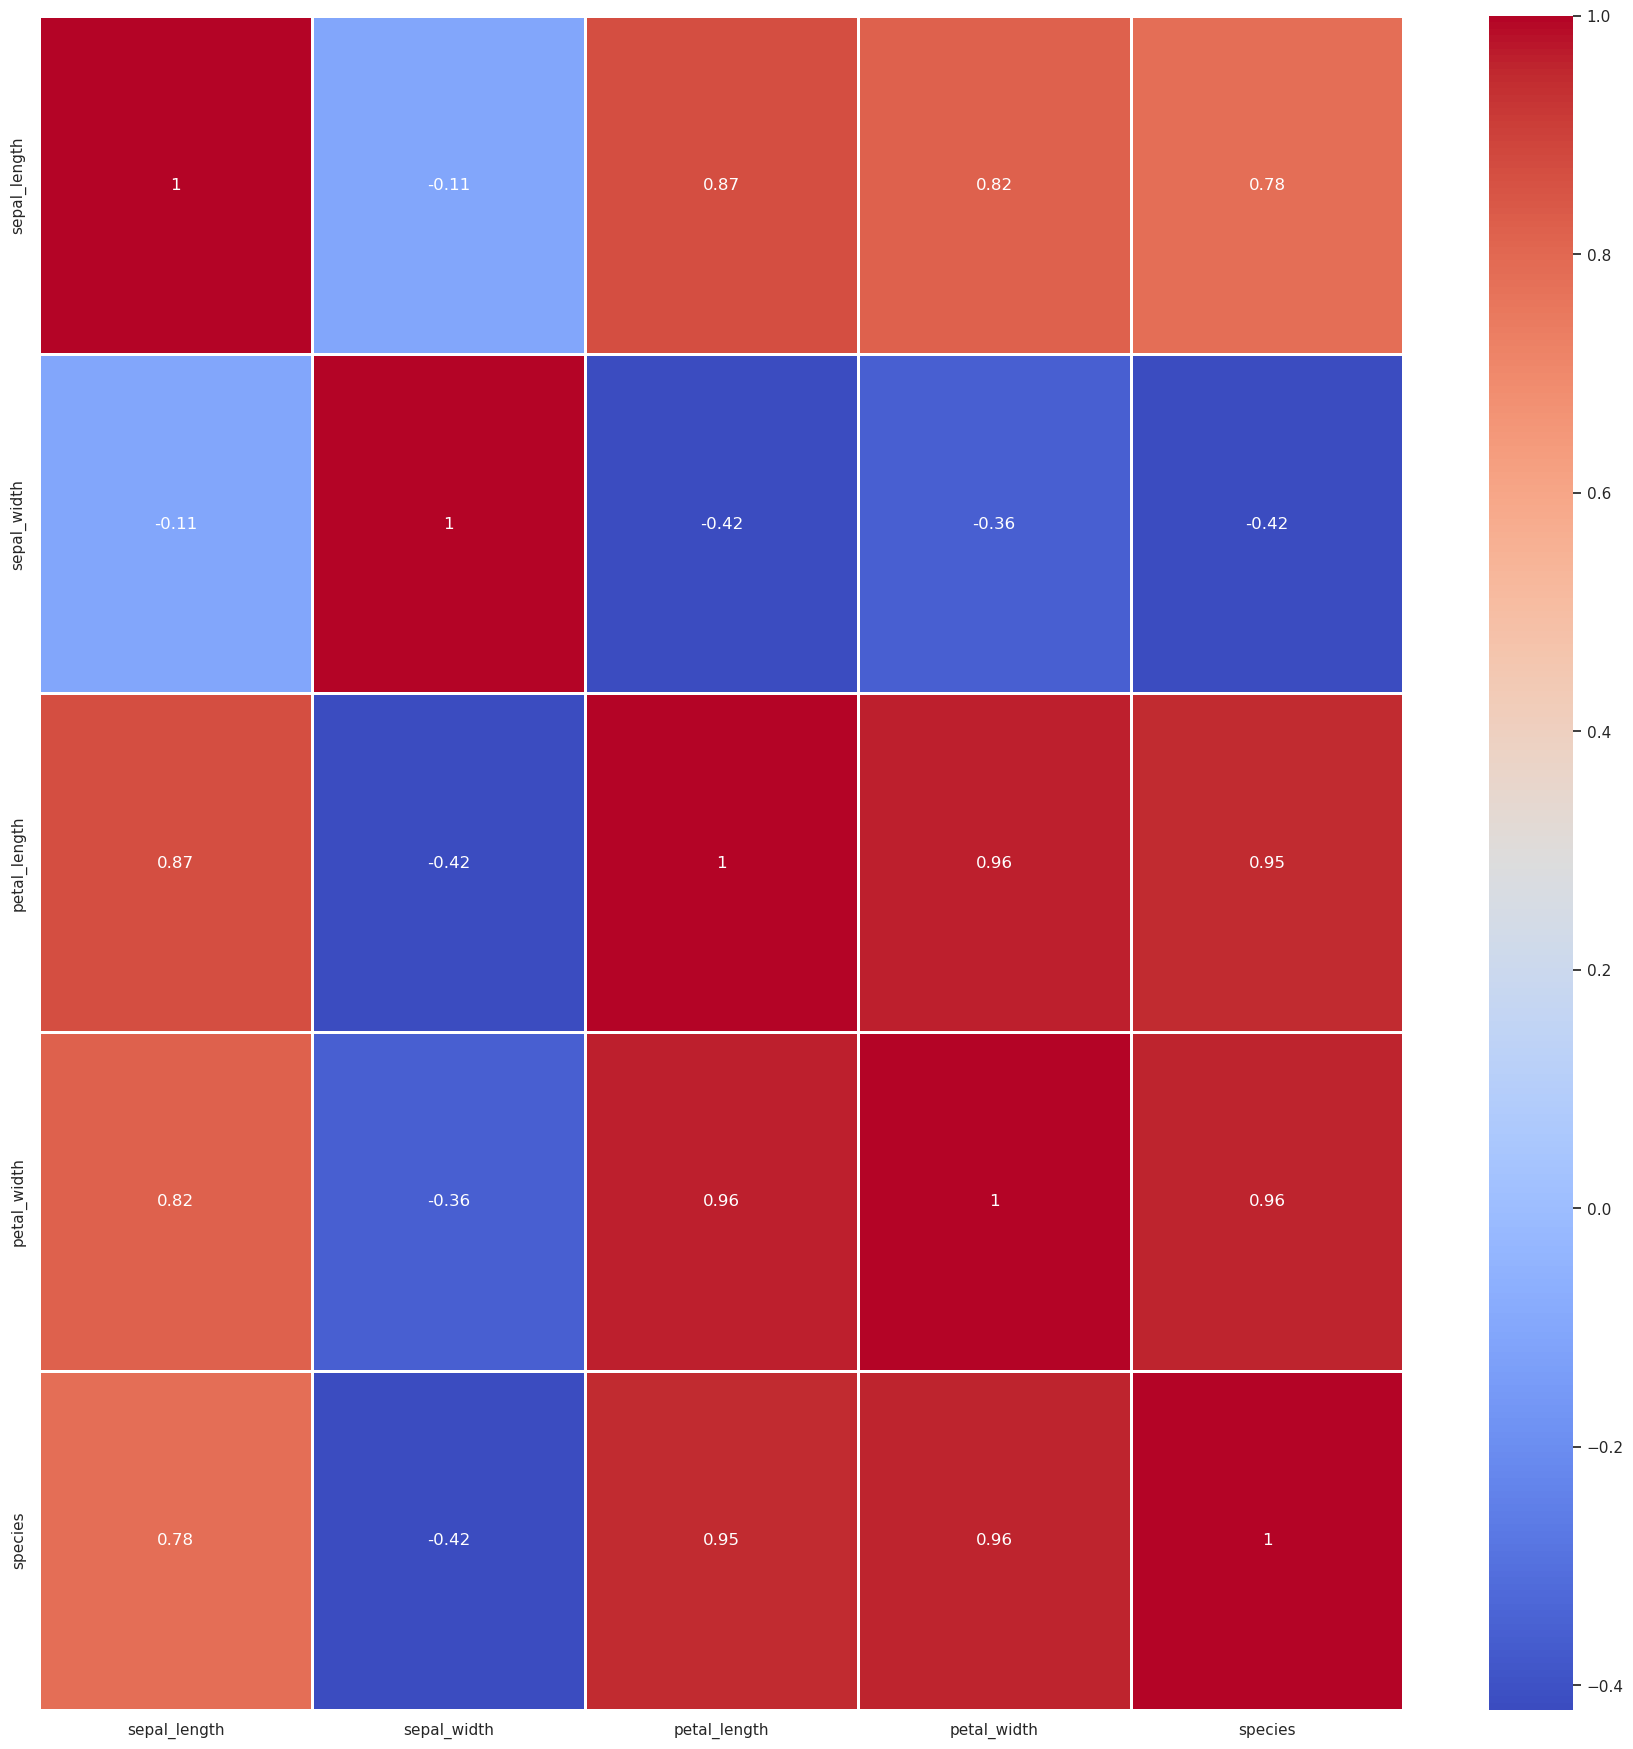

In [12]:
f = plt.figure(figsize=(22,22))
sns.set()
sns.heatmap(df.corr(), linewidths='2',annot=True,cmap='coolwarm')

In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [16]:
df.shape

(150, 5)

## 3. Model training

In [17]:
X = df.drop(['species'],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Our target y will be the column Class.

In [18]:
Y = df['species']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size=0.7,random_state=42)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Now it's time the test algorimths and we can choose the best

## 1. Gaussian

In [21]:
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_pred = gauss.predict(X_test)


In [22]:
gauss_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {gauss_accuracy} %")


the accuracy is 97.78 %


In [23]:

predictions = gauss.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 2.22 %


## 1. kneighbor

In [24]:
kneighbor = KNeighborsClassifier(n_neighbors = 4)
kneighbor.fit(X_train, Y_train)
Y_pred = kneighbor.predict(X_test)


In [25]:
kneighbor_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {kneighbor_accuracy} %")


the accuracy is 97.78 %


In [26]:

predictions = kneighbor.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 2.22 %


##  3.7 Random Forest Classifier algorithm


In [27]:

random_fr = RandomForestClassifier(n_estimators=100,random_state=42)
random_fr.fit(X_train, Y_train)
Y_pred = random_fr.predict(X_test)


In [28]:
random_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {random_accuracy} %")

the accuracy is 100.0 %


In [29]:

predictions = random_fr.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 0.0 %


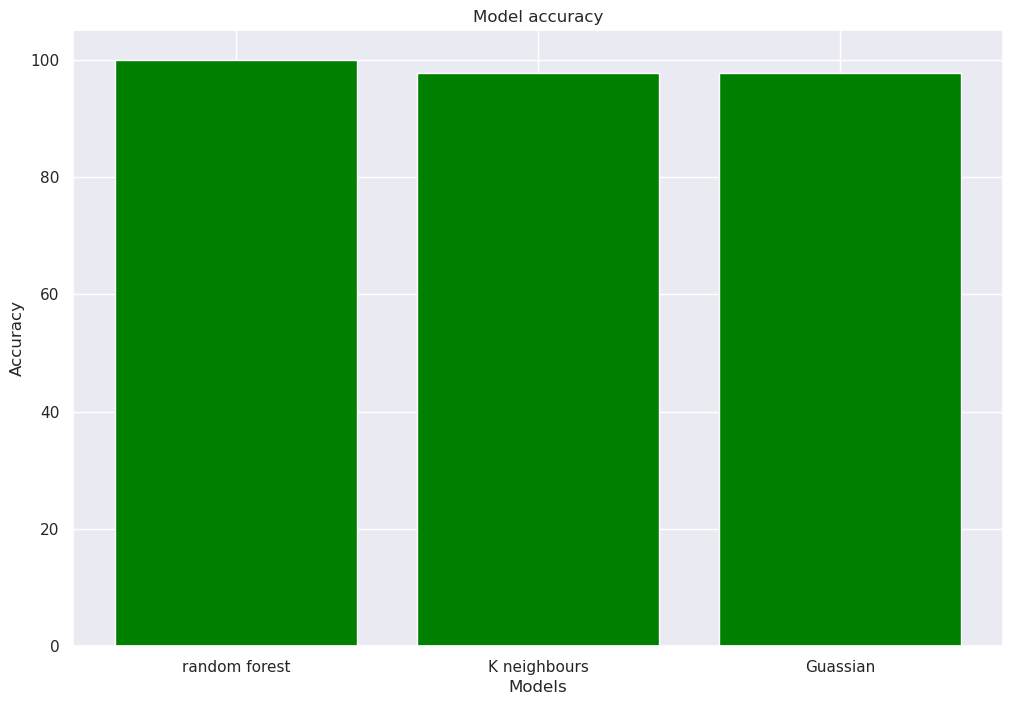

In [30]:
import matplotlib.pyplot as plt

models = ['random forest','K neighbours','Guassian']
scores = [random_accuracy ,kneighbor_accuracy,gauss_accuracy]


plt.figure(figsize=(12, 8))
plt.bar(models, scores, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model accuracy')

plt.show()

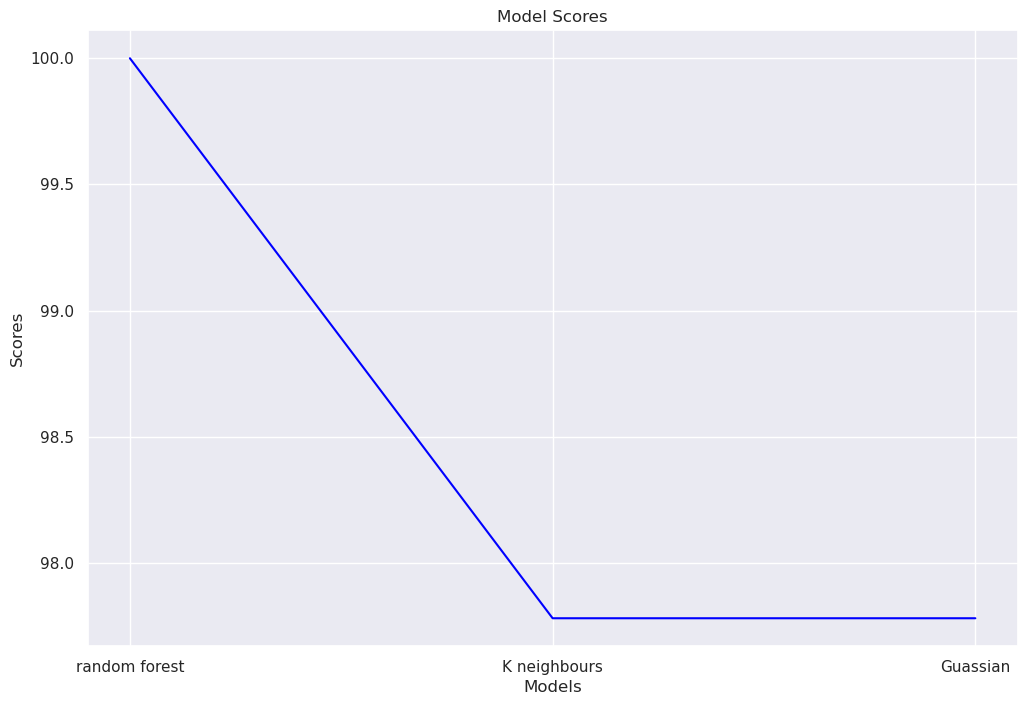

In [31]:
import matplotlib.pyplot as plt

models = ['random forest','K neighbours','Guassian']
scores = [random_accuracy,kneighbor_accuracy,gauss_accuracy]


plt.figure(figsize=(12, 8))
plt.plot(models, scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores')

plt.show()

We can save the model

In [32]:
joblib.dump(random_fr, "irisflower.sav")

['irisflower.sav']

In [33]:
# export the cleaned csv
df.to_csv("irisflower_cleaned.csv")